In [8]:
import numpy as np
import cvxpy as cp

# Given data
A = np.array([[1, 1], [0, 0.95]])
b = np.array([0, 0.1])
x0 = np.array([0, 0])
xdes = np.array([10, 0])
N = 20

# Define decision variables
u = cp.Variable(N)
x = cp.Variable((N, 2))  # State variables x(t) for t = 0, ..., N-1

# Define the cost function
F = cp.sum(cp.abs(u) + cp.maximum(0, 2*cp.abs(u) - 1))

# Define the constraints
dynamics_constraints = [x[0] == x0]
for t in range(1,N-1):
    dynamics_constraints.append(x[t+1] == A @ x[t] + b * u[t])
    
dynamics_constraints.append(x[N-1] == xdes)

# Add actuator constraints
actuator_constraints = [cp.abs(u) <= 1]
# Create the LP problem
problem = cp.Problem(cp.Minimize(F), dynamics_constraints + actuator_constraints)

# Solve the problem
problem.solve(solver=cp.ECOS)

u_opt = u.value
print("Optimal Control Input:")
print(u_opt)


Optimal Control Input:
[ 3.79815582e-22 -2.30219137e-19  1.85290257e-19  3.77140335e-19
  6.39783930e-19  9.76947122e-19  1.39255917e-18  1.89073942e-18
  2.47584077e-18  3.15243552e-18  3.92533920e-18  4.79962078e-18
  5.78061588e-18  6.87394098e-18  8.08550820e-18  9.42154089e-18
  1.08885897e-17  1.24935481e-17  1.42436815e-17  3.79815582e-22]


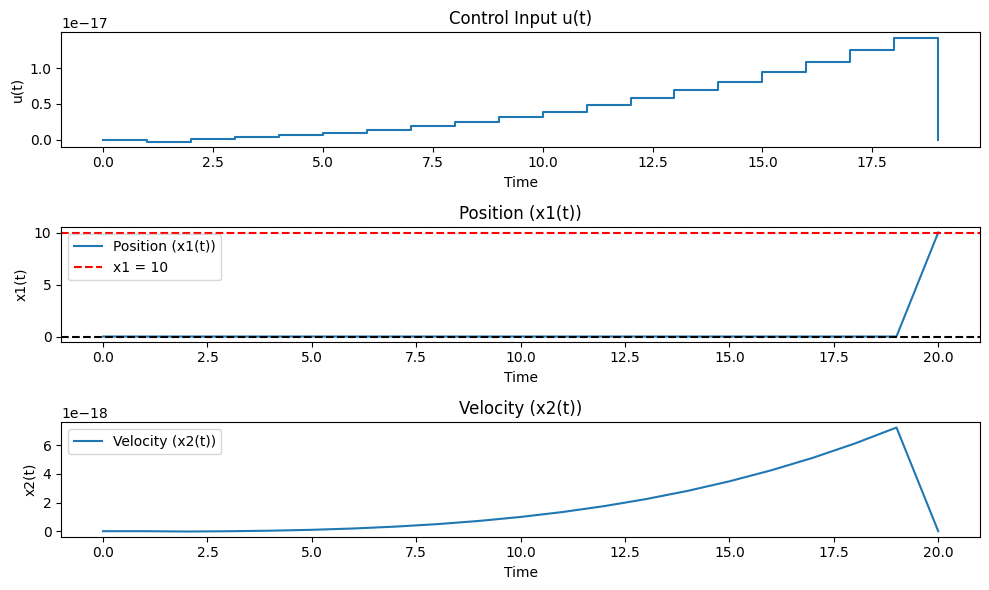

In [13]:
import matplotlib.pyplot as plt

x_opt = np.zeros((N+1, 2))
x_opt[0] = x0
for t in range(1, N):
    x_opt[t] = A @ x_opt[t - 1] + b * u_opt[t - 1]
x_opt[N] = xdes  # Set the state at time N to the desired state

# Plot the input signal u(t)
t = np.arange(N)
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.step(t, u_opt, where='post')
plt.title('Control Input u(t)')
plt.xlabel('Time')
plt.ylabel('u(t)')

# Plot position x1(t)
t = np.arange(N+1)
plt.subplot(3, 1, 2)
plt.plot(t, x_opt[:, 0], label='Position (x1(t))')
plt.axhline(y=10, color='r', linestyle='--', label='x1 = 10')
plt.axhline(color='k', linestyle='--')
plt.title('Position (x1(t))')
plt.xlabel('Time')
plt.ylabel('x1(t)')
plt.legend()

# Plot velocity x2(t)
plt.subplot(3, 1, 3)
plt.plot(t, x_opt[:, 1], label='Velocity (x2(t))')
plt.title('Velocity (x2(t))')
plt.xlabel('Time')
plt.ylabel('x2(t)')
plt.legend()

plt.tight_layout()
plt.show()
